<a href="https://colab.research.google.com/github/Akshcodecraft/ImageRecoML/blob/main/Image_Recognition_BootCamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"akshayaramasamy","key":"df7a20ccd7961e8d7d2940f777bc360a"}'}

In [4]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mnist-dataset


In [7]:
import tensorflow as tf
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Train shape: (60000, 28, 28), Test shape: (10000, 28, 28)


In [8]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
print(f"Train reshaped: {X_train.shape}")

Train reshaped: (60000, 28, 28, 1)


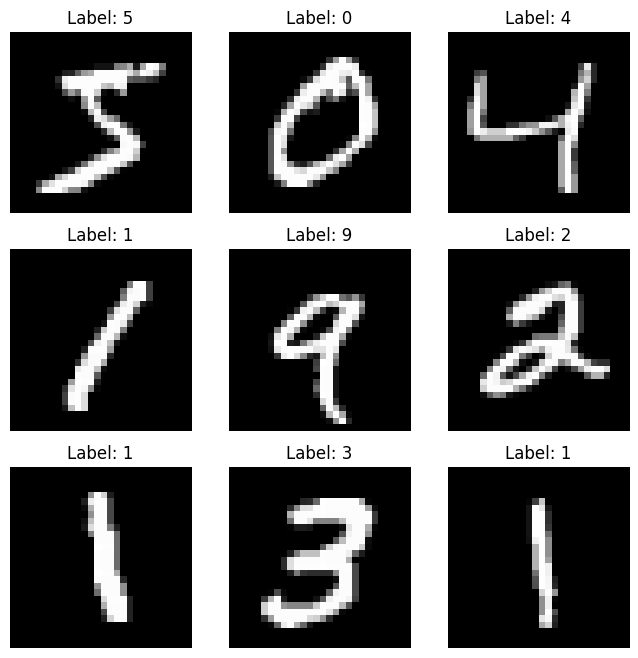

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [10]:
(X_train_c10, y_train_c10), (X_test_c10, y_test_c10) = tf.keras.datasets.cifar10.load_data()
X_train_c10 = X_train_c10 / 255.0
X_test_c10 = X_test_c10 / 255.0
print(f"CIFAR-10 train shape: {X_train_c10.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step
CIFAR-10 train shape: (50000, 32, 32, 3)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.8969 - loss: 0.3288 - val_accuracy: 0.9806 - val_loss: 0.0676
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.9828 - loss: 0.0554 - val_accuracy: 0.9828 - val_loss: 0.0548
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.9885 - loss: 0.0370 - val_accuracy: 0.9883 - val_loss: 0.0381
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9925 - loss: 0.0216 - val_accuracy: 0.9898 - val_loss: 0.0357
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 30ms/step - accuracy: 0.9947 - loss: 0.0160 - val_accuracy: 0.9875 - val_loss: 0.0441


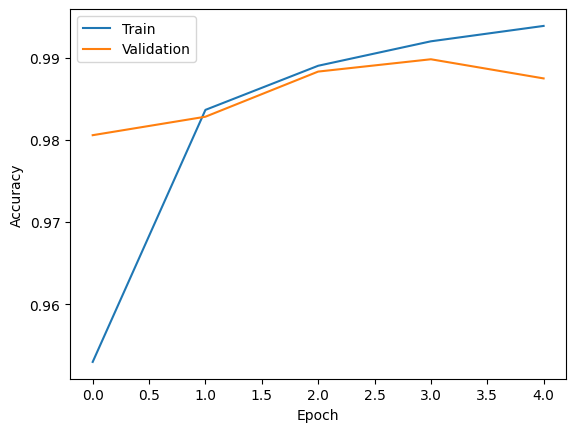

In [13]:
plt.plot(history.history['accuracy'],label='Train')
plt.plot(history.history['val_accuracy'],
         label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
test_loss,test_acc=model.evaluate(X_test,y_test)
print("Test Accuracy:{test_acc:.4f}")
y_pred=model.predict(X_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9879 - loss: 0.0439
Test Accuracy:{test_acc:.4f}
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [15]:
from tensorflow.keras.layers import Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Dropout(0.25),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen= ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train_c10)

In [17]:
from tensorflow.keras.layers import BatchNormalization
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(datagen.flow(X_train_c10,y_train_c10,batch_size=32),epochs=10,validation_data=(X_test_c10,y_test_c10))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 124s 78ms/step - accuracy: 0.3536 - loss: 1.7599 - val_accuracy: 0.5429 - val_loss: 1.3208
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 122s 78ms/step - accuracy: 0.5375 - loss: 1.2901 - val_accuracy: 0.6232 - val_loss: 1.0828
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 78ms/step - accuracy: 0.5949 - loss: 1.1570 - val_accuracy: 0.6637 - val_loss: 0.9636
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 122s 78ms/step - accuracy: 0.6257 - loss: 1.0835 - val_accuracy: 0.6261 - val_loss: 1.0808
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 124s 79ms/step - accuracy: 0.6402 - loss: 1.0396 - val_accuracy: 0.6679 - val_loss: 0.9615
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 122s 78ms/step - accuracy: 0.6535 - loss: 0.9997 - val_accuracy: 0.6891 - val_loss: 0.9169
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 121s 78ms/step - accuracy: 0.6676 - loss: 0.9622 - val_accuracy: 0.7209 - val_loss: 0.8325
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 121s 77ms/step - accuracy: 0.6788 - lo

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step
              precision    recall  f1-score   support

           0       0.70      0.82      0.76      1000
           1       0.83      0.88      0.85      1000
           2       0.71      0.52      0.60      1000
           3       0.66      0.40      0.50      1000
           4       0.72      0.58      0.64      1000
           5       0.73      0.54      0.62      1000
           6       0.61      0.88      0.72      1000
           7       0.65      0.82      0.72      1000
           8       0.82      0.82      0.82      1000
           9       0.73      0.85      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.70     10000
weighted avg       0.72      0.71      0.70     10000



<function matplotlib.pyplot.show(close=None, block=None)>

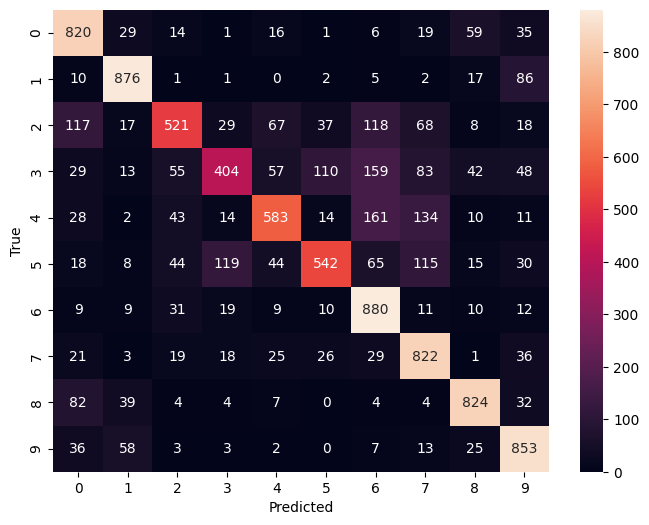

In [18]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np

y_pred_c10=model.predict(X_test_c10).argmax(axis=1)
cm=confusion_matrix(y_test_c10,y_pred_c10)
print(classification_report(y_test_c10,y_pred_c10))

import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show

In [19]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 92% 200M/218M [00:00<00:00, 498MB/s] 
100% 218M/218M [00:00<00:00, 497MB/s]


In [20]:
import zipfile
with zipfile.ZipFile('/content/cat-and-dog.zip','r')as zip_ref:
  zip_ref.extractall('/content/dogs-vs-cats')

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = datagen.flow_from_directory(
    '/content/dogs-vs-cats',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)
val_generator = datagen.flow_from_directory(
    '/content/dogs-vs-cats',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 8023 images belonging to 2 classes.
Found 2005 images belonging to 2 classes.


In [22]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

base_model=MobileNetV2(weights='imagenet',include_top=False,input_shape=(224,224,3))
base_model.trainable=False

model=Sequential([base_model,GlobalAveragePooling2D(),Dense(128,activation='relu'),Dense(1,activation='sigmoid')])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_generator,epochs=5,validation_data=val_generator)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 427s 2s/step - accuracy: 0.7923 - loss: 0.5423 - val_accuracy: 0.7985 - val_loss: 0.5084
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 415s 2s/step - accuracy: 0.7900 - loss: 0.5052 - val_accuracy: 0.7985 - val_loss: 0.5118
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 415s 2s/step - accuracy: 0.7973 - loss: 0.4869 - val_accuracy: 0.7985 - val_loss: 0.5190
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 413s 2s/step - accuracy: 0.8032 - loss: 0.4676 - val_accuracy: 0.7985 - val_loss: 0.5266
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 411s 2s/step - accuracy: 0.8062 - loss: 0.4421 - val_accuracy: 0.7975 - val_loss: 0.5404


In [23]:
base_model.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_generator, epochs=3, validation_data=val_generator)

Epoch 1/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1735s 7s/step - accuracy: 0.7994 - loss: 0.4897 - val_accuracy: 0.7975 - val_loss: 0.5327
Epoch 2/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1721s 7s/step - accuracy: 0.8005 - loss: 0.4477 - val_accuracy: 0.7975 - val_loss: 0.5342
Epoch 3/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1691s 7s/step - accuracy: 0.8090 - loss: 0.4225 - val_accuracy: 0.7965 - val_loss: 0.5366


In [25]:
model.save('mobilenet_cats_dogs.h5')
#To load
import tensorflow as tf
loaded_model=tf.keras.models.load_model('mobilenet_cats_dogs.h5')

63/63 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step


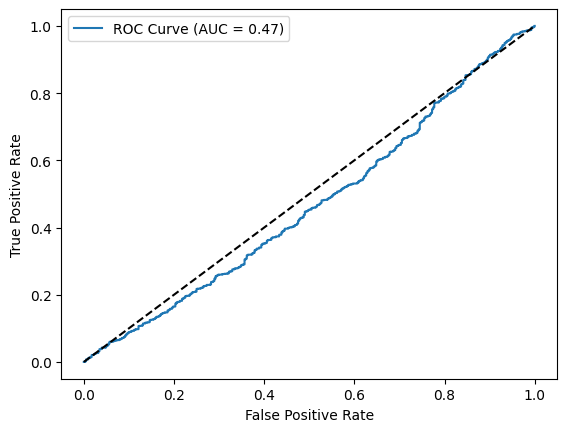

In [26]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = loaded_model.predict(val_generator)
fpr, tpr, _ = roc_curve(val_generator.classes, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [27]:
from google.colab import files
uploaded = files.upload()  # Upload e.g. 'mycat.jpg'

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

img_path = 'download.jpeg'  # Replace with your filename
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

prediction = loaded_model.predict(img_array)
print("Predicted class:", "Dog" if prediction[0][0] > 0.5 else "Cat")

Saving download.jpeg to download.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted class: Dog


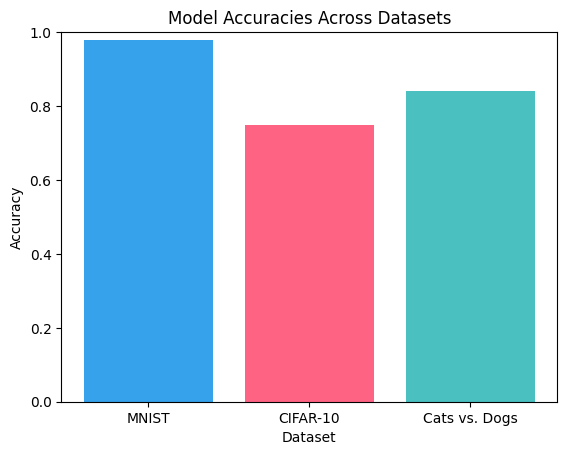

In [28]:
import matplotlib.pyplot as plt
datasets = ['MNIST', 'CIFAR-10', 'Cats vs. Dogs']
accuracies = [0.98, 0.75, 0.84]
plt.bar(datasets, accuracies, color=['#36A2EB', '#FF6384', '#4BC0C0'])
plt.title('Model Accuracies Across Datasets')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()